In [15]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
data = pd.read_csv("Merged_data.csv")

In [17]:
df.head()

,Date,Open,High,Low,Close,Volume,SP500,ADS_Index,Returns,Mkt-RF,SMB,HML,RF,Average_OC,Average_all
0,2016-01-06,753.57,765.73,748.00,760.40,16789,1990.26,-0.308089,0.002748,-1.35,-0.12,0.00,0.0,756.985,756.9250
1,2016-01-07,740.00,755.31,735.28,741.45,22332,1943.09,-0.294335,-0.002893,-2.44,-0.29,0.08,0.0,740.725,743.0100
2,2016-01-08,752.49,756.25,728.92,730.91,16494,1922.03,-0.281488,-0.024436,-1.11,-0.47,-0.03,0.0,741.700,742.1425
3,2016-01-11,732.50,736.00,719.56,734.56,18012,1923.67,-0.248493,-0.013710,-0.06,-0.65,0.34,0.0,733.530,730.6550
4,2016-01-12,733.99,748.34,733.99,744.51,15821,1938.68,-0.239263,0.002951,0.71,-0.40,-0.77,0.0,739.250,740.2075


In [44]:
df1 = data[['Close','Open']].copy()

In [47]:
def CAPM(df):
    df= df.pct_change(1)
    df = df.dropna(axis=0)
    X = df
    Y_CAPM=data['Returns'][1:]
    X=np.matrix(X)
    Y_CAPM=np.matrix(Y_CAPM)
    intercept_arr1 = [1]*len(df['Open'])
    XT1 = np.matrix(np.asarray([np.asarray(intercept_arr1),np.asarray(df['Open'])]) )
    XTT1 = np.matrix(np.transpose(XT1))
    mult_1 = XT1@XTT1
    B1 = np.matrix(((np.linalg.inv(mult_1))@XT1))
    Y_CAPM=Y_CAPM.reshape(668,1)
    beta=B1@Y_CAPM
    print("BETA values are : {}".format(beta))
    Y_CAPM_HAT = np.matrix(XTT1@beta)
    rmse1=np.asarray(Y_CAPM - Y_CAPM_HAT)
    rmse_CAPM=np.sqrt(np.mean(rmse1*rmse1))
    plt.figure(figsize=(20,10))
    plt.plot(Y_CAPM)
    plt.plot(Y_CAPM_HAT)
    return Y_CAPM_HAT,rmse_CAPM,Y_CAPM

BETA values are : [[1.72610464e-04]
 [6.81387292e-01]]
RMSE=  0.008805862102093451


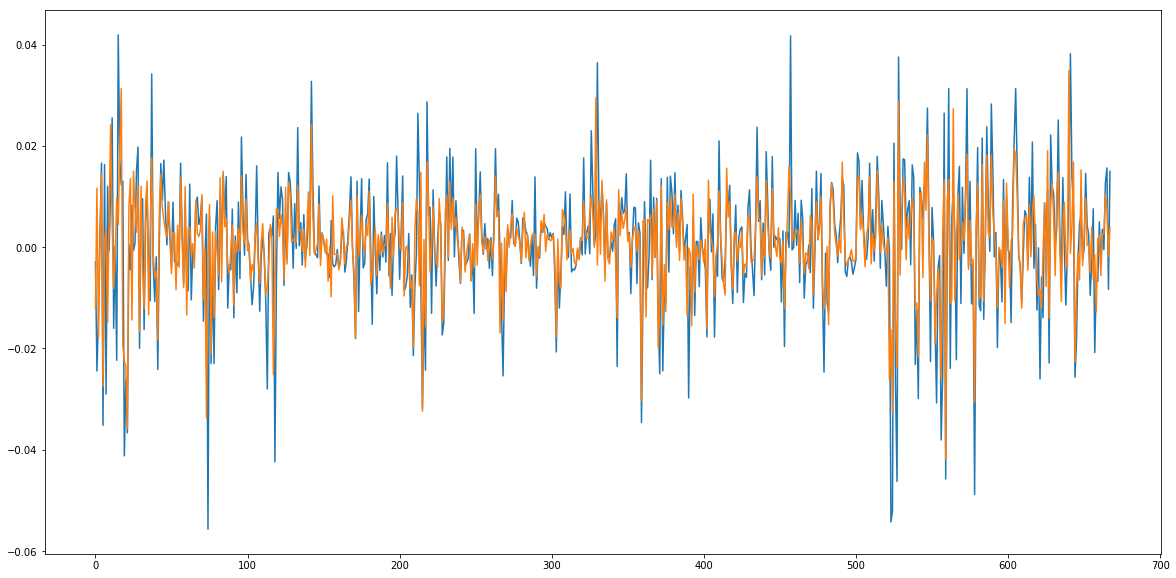

In [52]:
Y_CAPM_HAT,rmse_CAPM,Y_CAPM=CAPM(df1)
print('RMSE= ',rmse_CAPM)

In [49]:
rmse_CAPM

0.008805862102093451